# <center>K Means clustering using US Arrests dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./USArrests.csv', index_col=0)
data.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
data.shape

(50, 4)

In [6]:
data.isnull().mean()*100

Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

### Hopkins test

<li> This test allows us to investigate the "clusterability" of our dataset.
<li> We have to scale the data inorder to do perform the test effectively.

In [8]:
from sklearn.preprocessing import scale

In [9]:
data_scaled = scale(data)

In [10]:
data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Function to do Hopkins test

In [11]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform

def hopkins_statistic(data, n_samples=100):
    """
    Calculate the Hopkins statistic for a given dataset.
    
    Parameters:
    data (array-like): Input data as a 2D array or dataframe.
    n_samples (int): Number of random samples to generate.
    
    Returns:
    float: Hopkins statistic value for the given data.
    """
    # Randomly sample the dataset
    random_samples = np.random.rand(n_samples, data.shape[1])

    # Compute the distances between random samples and actual data points
    distance_actual = squareform(pdist(data))
    knn_distance_actual = NearestNeighbors(n_neighbors=1).fit(data).kneighbors(random_samples, return_distance=True)[0].flatten()

    # Compute the distances between random samples
    distance_random = squareform(pdist(random_samples))

    # Calculate the Hopkins statistic
    numerator = np.sum(distance_actual)
    denominator = np.sum(distance_actual) + np.sum(distance_random)
    hopkins_stat = numerator / denominator

    return hopkins_stat

In [12]:
hopkins_statistic(data_scaled, n_samples=10)

0.9893201525297881

<li> The Hopkins statistic is a measure of clustering tendency and its values range from 0 to 1. A value close to 0 indicates a uniformly distributed data (low clustering tendency) while a value close to 1 suggests a strongly clustered data (high clustering tendency).

<li> 
As a rule of thumb, a Hopkins statistic value below 0.5 is often considered to indicate a low clustering tendency and suggests that the data is relatively uniformly distributed. A value above 0.5 suggests a higher clustering tendency and indicates the presence of meaningful clusters in the data. It's important to note that the threshold can vary depending on the context and the specific dataset being analyzed.


#### Kmeans modelling

In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans(n_clusters=2, random_state=42)

In [15]:
k_means.fit(data)

KMeans(n_clusters=2, random_state=42)

#### Visualising the clusters

In [16]:
clusters = k_means.labels_

In [17]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

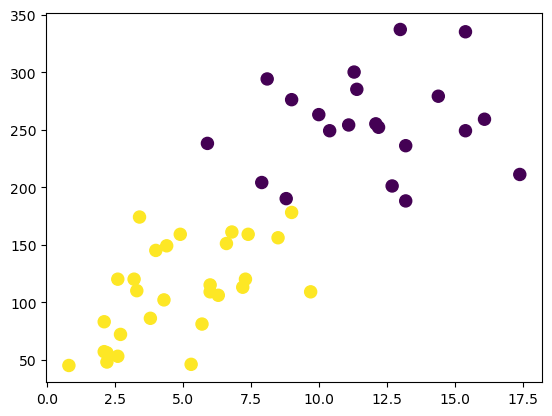

In [18]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clusters, s = 75)
plt.show()

#### Add cluster centres to the plot

In [19]:
centroids = k_means.cluster_centers_

In [20]:
centroids

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

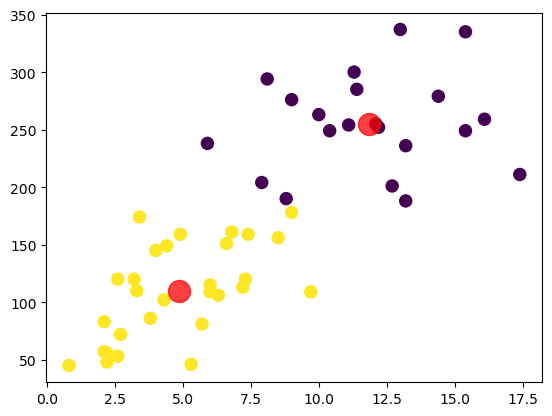

In [21]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clusters, s = 75)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 250, alpha=0.75)
plt.show()

#### We can see two clusters but how should we know that there are exacly how many clusters present? For that purpose we need to consider the "Elbow method".

#### The Elbow method

In [22]:
rate = []
k = range(2, 10)
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    rate.append(kmeans.inertia_)

In [23]:
rate

[96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777,
 13732.27255952381,
 12162.12875]

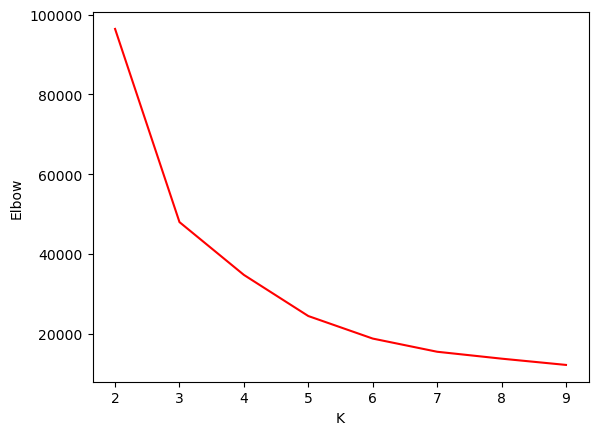

In [24]:
plt.plot(k, rate, 'red')
plt.xlabel("K")
plt.ylabel("Elbow")
plt.show()

### We need another library called "Yellowbrick" for the visualisation

#### !pip install yellowbrick

In [25]:
from yellowbrick.cluster import KElbowVisualizer

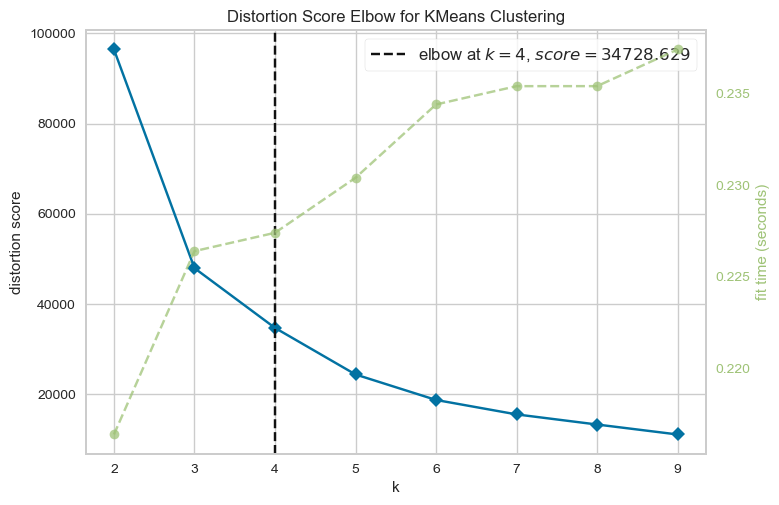

In [26]:
k_means_yellowbrick = KMeans()
graph = KElbowVisualizer(k_means_yellowbrick, k = (2,10))
graph.fit(data)
graph.poof();

In [27]:
new_kmeans = KMeans(n_clusters=4, random_state=42)

In [28]:
new_kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [29]:
labels = new_kmeans.labels_

In [30]:
labels

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [31]:
data['Cluster_ID'] = labels

In [32]:
data.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster_ID
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


#### Model evaluation

#### Silhouette score

<li> The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
print(f"Silhouette score(n=4): {silhouette_score(data, labels)}")

Silhouette score(n=4): 0.5014799771920441


#### We can infer that the value is 0.50, hence our model is neither good or bad.

#### Lets plot the clusters now.

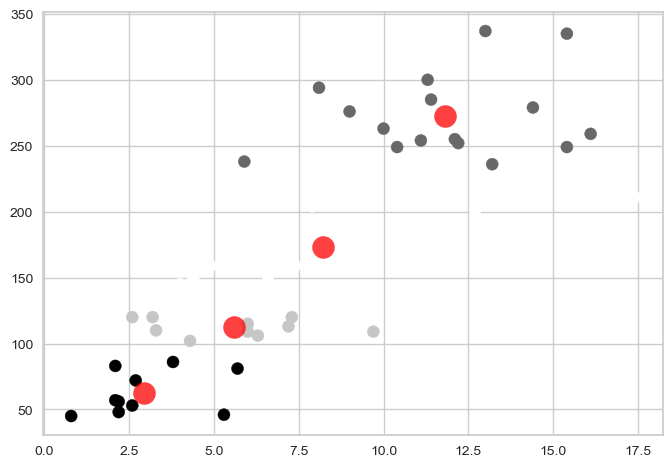

In [35]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = labels, s = 75)
plt.scatter(new_kmeans.cluster_centers_[:, 0], new_kmeans.cluster_centers_[:, 1], c = 'red', s = 250, alpha=0.75)
plt.show()

**ARI Score** 

#### Adjusted Rand Index (ARI)
<li> The Adjusted Rand score is introduced to determine whether two cluster results are similar to each other. In the formula, the “RI” stands for the rand index, which calculates a similarity between two cluster results by taking all points identified within the same cluster.
<li> The higher the ARI value, the closer the two clusterings are to each other. It ranges from -1 to 1, where 1 indicates perfect agreement between the two clusterings, 0 indicates a random agreement and -1 indicates that the two clusterings are completely different.

In [36]:
from sklearn.metrics.cluster import adjusted_rand_score

In [37]:
new_data = data.sample(15, random_state = 42)
new_data

,Murder,Assault,UrbanPop,Rape,Cluster_ID
Indiana,7.2,113,65,21.0,1
South Carolina,14.4,279,48,22.5,2
New Mexico,11.4,285,70,32.1,2
Virginia,8.5,156,63,20.7,0
Louisiana,15.4,249,66,22.2,2
Wisconsin,2.6,53,66,10.8,3
Nebraska,4.3,102,62,16.5,1
Montana,6.0,109,53,16.4,1
North Carolina,13.0,337,45,16.1,2
Maryland,11.3,300,67,27.8,2


#### Lets assign a column with random values for demonstration purpose.

In [38]:
new_data['True_Label'] = [1,2,3,0,2,2,1,3,2,0,2,1,1,2,3]

In [39]:
new_data

,Murder,Assault,UrbanPop,Rape,Cluster_ID,True_Label
Indiana,7.2,113,65,21.0,1,1
South Carolina,14.4,279,48,22.5,2,2
New Mexico,11.4,285,70,32.1,2,3
Virginia,8.5,156,63,20.7,0,0
Louisiana,15.4,249,66,22.2,2,2
Wisconsin,2.6,53,66,10.8,3,2
Nebraska,4.3,102,62,16.5,1,1
Montana,6.0,109,53,16.4,1,3
North Carolina,13.0,337,45,16.1,2,2
Maryland,11.3,300,67,27.8,2,0


#### Here consider the Cluster_ID as prediuction and True_Label as Actual

In [40]:
adjusted_rand_score(new_data.Cluster_ID, new_data.True_Label)

0.2153846153846154

#### We can infer from the result that the model is not performing that much.